In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

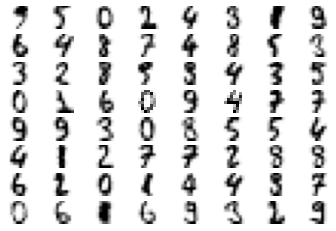

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

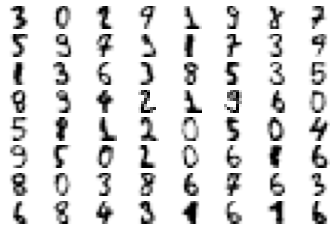

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10049 stdev: 0.03967
Best fitness: 0.20346 - size: (10, 64) - species 5 - id 15
Average adjusted fitness: 0.092
Mean genetic distance 2.781, standard deviation 0.303
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 44.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11082 stdev: 0.03960
Best fitness: 0.26407 - size: (11, 64) - species 21 - id 263
Average adjusted fitness: 0.091
Mean genetic distance 2.882, standard deviation 0.342
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 36.120 sec (40.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.11853 stdev: 0.04337
Best fitness: 0.26407 - size: (11, 64) - species 21 - id 263
Average adjusted fitness: 0.096
Mean genetic distance 2.931, standard deviation 0.369
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 35.865 sec (

Population's average fitness: 0.17151 stdev: 0.05493
Best fitness: 0.28386 - size: (15, 72) - species 13 - id 3231
Average adjusted fitness: 0.131
Mean genetic distance 3.186, standard deviation 0.427
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 46.206 sec (42.815 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.17046 stdev: 0.05759
Best fitness: 0.28386 - size: (15, 72) - species 13 - id 3231
Average adjusted fitness: 0.159
Mean genetic distance 3.173, standard deviation 0.437
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 45.608 sec (43.617 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16983 stdev: 0.06111
Best fitness: 0.28757 - size: (13, 69) - species 12 - id 3515
Average adjusted fitness: 0.121
Mean genetic distance 3.169, standard deviation 0.444
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 46.414 sec (44.584 average)

Population's average fitness: 0.17392 stdev: 0.05882
Best fitness: 0.32282 - size: (17, 73) - species 2 - id 6332
Average adjusted fitness: 0.136
Mean genetic distance 3.153, standard deviation 0.535
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 58.073 sec (56.271 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17935 stdev: 0.05748
Best fitness: 0.32282 - size: (17, 73) - species 2 - id 6332
Average adjusted fitness: 0.135
Mean genetic distance 3.140, standard deviation 0.543
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 56.931 sec (56.425 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17556 stdev: 0.05985
Best fitness: 0.32282 - size: (17, 73) - species 2 - id 6332
Average adjusted fitness: 0.144
Mean genetic distance 3.120, standard deviation 0.544
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 57.860 sec (56.651 average)

 

Population's average fitness: 0.17522 stdev: 0.06682
Best fitness: 0.34199 - size: (19, 74) - species 15 - id 11316
Average adjusted fitness: 0.134
Mean genetic distance 3.168, standard deviation 0.556
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 62.421 sec (60.497 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18619 stdev: 0.06073
Best fitness: 0.34199 - size: (19, 74) - species 15 - id 11316
Average adjusted fitness: 0.115
Mean genetic distance 3.161, standard deviation 0.570
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 61.036 sec (60.624 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.17960 stdev: 0.06664
Best fitness: 0.34199 - size: (19, 74) - species 15 - id 11316
Average adjusted fitness: 0.152
Mean genetic distance 3.129, standard deviation 0.558
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 60.412 sec (60.718 avera

Population's average fitness: 0.18030 stdev: 0.06429
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.113
Mean genetic distance 3.153, standard deviation 0.667
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 67.395 sec (56.851 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.17895 stdev: 0.06639
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.142
Mean genetic distance 3.180, standard deviation 0.660
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 66.336 sec (57.934 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.17652 stdev: 0.06778
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.157
Mean genetic distance 3.168, standard deviation 0.670
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 65.316 sec (59.044 average)

Population's average fitness: 0.16794 stdev: 0.06236
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.124
Mean genetic distance 2.978, standard deviation 0.571
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 69.675 sec (68.674 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.17369 stdev: 0.06420
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.127
Mean genetic distance 2.983, standard deviation 0.568
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 71.373 sec (69.080 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.17453 stdev: 0.06052
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.124
Mean genetic distance 2.973, standard deviation 0.530
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 71.497 sec (69.407 aver

Population's average fitness: 0.16920 stdev: 0.06627
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.131
Mean genetic distance 2.914, standard deviation 0.555
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 74.345 sec (74.303 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.16699 stdev: 0.06275
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.135
Mean genetic distance 2.913, standard deviation 0.584
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 72.777 sec (74.257 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.16389 stdev: 0.06566
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.137
Mean genetic distance 2.912, standard deviation 0.559
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.037 sec (73.871 averag

Population's average fitness: 0.17830 stdev: 0.06551
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.126
Mean genetic distance 2.917, standard deviation 0.581
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 75.831 sec (74.045 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.17457 stdev: 0.06618
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.098
Mean genetic distance 2.916, standard deviation 0.578
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 73.943 sec (74.228 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.17919 stdev: 0.06749
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.142
Mean genetic distance 2.917, standard deviation 0.581
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 75.010 sec (74.616 ave

Population's average fitness: 0.17300 stdev: 0.06693
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.119
Mean genetic distance 2.899, standard deviation 0.548
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 75.702 sec (75.665 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.17845 stdev: 0.06600
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.119
Mean genetic distance 2.898, standard deviation 0.570
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.491 sec (75.474 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.17390 stdev: 0.06774
Best fitness: 0.37229 - size: (16, 74) - species 12 - id 12892
Average adjusted fitness: 0.111
Mean genetic distance 2.901, standard deviation 0.586
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 75.665 sec (75.493 averag

Population's average fitness: 0.16661 stdev: 0.06801
Best fitness: 0.37600 - size: (18, 79) - species 12 - id 34810
Average adjusted fitness: 0.133
Mean genetic distance 2.863, standard deviation 0.483
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 75.111 sec (74.702 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.17065 stdev: 0.07134
Best fitness: 0.37600 - size: (18, 79) - species 12 - id 34810
Average adjusted fitness: 0.140
Mean genetic distance 2.890, standard deviation 0.474
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 73.302 sec (74.583 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.17157 stdev: 0.07185
Best fitness: 0.37600 - size: (18, 79) - species 12 - id 34810
Average adjusted fitness: 0.142
Mean genetic distance 2.893, standard deviation 0.474
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 74.858 sec (74.627 ave

Population's average fitness: 0.18121 stdev: 0.06512
Best fitness: 0.37600 - size: (18, 79) - species 12 - id 34810
Average adjusted fitness: 0.145
Mean genetic distance 2.803, standard deviation 0.483
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 73.178 sec (72.991 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.18155 stdev: 0.06685
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.134
Mean genetic distance 2.840, standard deviation 0.455
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 75.775 sec (73.310 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.18478 stdev: 0.06675
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.133
Mean genetic distance 2.840, standard deviation 0.474
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 75.311 sec (73.552 ave

Population's average fitness: 0.18898 stdev: 0.07160
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.168
Mean genetic distance 2.825, standard deviation 0.556
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.413 sec (72.930 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.18663 stdev: 0.07510
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.146
Mean genetic distance 2.838, standard deviation 0.547
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 73.927 sec (73.098 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.19113 stdev: 0.06999
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.154
Mean genetic distance 2.858, standard deviation 0.537
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.959 sec (73.227 avera

Population's average fitness: 0.17796 stdev: 0.06736
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.158
Mean genetic distance 2.978, standard deviation 0.601
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 60.953 sec (64.280 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.17840 stdev: 0.07257
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.134
Mean genetic distance 2.944, standard deviation 0.574
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 61.732 sec (63.156 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.18895 stdev: 0.06640
Best fitness: 0.37910 - size: (31, 88) - species 67 - id 42076
Average adjusted fitness: 0.144
Mean genetic distance 2.921, standard deviation 0.582
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 60.389 sec (61.876 ave

Population's average fitness: 0.19127 stdev: 0.06907
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.173
Mean genetic distance 3.002, standard deviation 0.620
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 75.358 sec (73.992 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.19071 stdev: 0.06868
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.145
Mean genetic distance 3.017, standard deviation 0.614
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 76.589 sec (74.144 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19155 stdev: 0.06675
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.160
Mean genetic distance 3.015, standard deviation 0.590
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 74.836 sec (74.460 

Mean genetic distance 3.025, standard deviation 0.645
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 80.033 sec (78.844 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.18710 stdev: 0.07498
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.152
Mean genetic distance 3.015, standard deviation 0.652
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 78.959 sec (79.125 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.19126 stdev: 0.07588
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.127
Mean genetic distance 3.023, standard deviation 0.668
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 79.846 sec (79.403 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.19043 stdev: 0.07156
Best fitness: 0.37910 - size: (31, 88) - speci

Population's average fitness: 0.17206 stdev: 0.07422
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.112
Mean genetic distance 2.802, standard deviation 0.463
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.235 sec (78.898 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.17629 stdev: 0.07043
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.137
Mean genetic distance 2.801, standard deviation 0.443
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 77.279 sec (78.794 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.16988 stdev: 0.06958
Best fitness: 0.37910 - size: (31, 88) - species 104 - id 42076
Average adjusted fitness: 0.128
Mean genetic distance 2.795, standard deviation 0.448
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 76.131 sec (78.416 ave

Mean genetic distance 2.906, standard deviation 0.475
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 77.672 sec (77.985 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.18824 stdev: 0.07447
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.162
Mean genetic distance 2.911, standard deviation 0.482
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 76.256 sec (77.810 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.19150 stdev: 0.07424
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.144
Mean genetic distance 2.873, standard deviation 0.511
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 78.158 sec (77.708 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.19278 stdev: 0.07322
Best fitness: 0.39023 - size: (31, 83) - speci

Population's average fitness: 0.18166 stdev: 0.07645
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.159
Mean genetic distance 2.799, standard deviation 0.442
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 78.004 sec (72.881 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.17759 stdev: 0.07672
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.151
Mean genetic distance 2.796, standard deviation 0.456
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 78.618 sec (74.019 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.18908 stdev: 0.07759
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.169
Mean genetic distance 2.824, standard deviation 0.434
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 78.300 sec (75.282 ave

Population's average fitness: 0.17575 stdev: 0.07588
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.139
Mean genetic distance 2.725, standard deviation 0.474
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 75.689 sec (76.235 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.17741 stdev: 0.07226
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.141
Mean genetic distance 2.714, standard deviation 0.489
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 75.104 sec (76.181 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.18120 stdev: 0.07145
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.150
Mean genetic distance 2.734, standard deviation 0.475
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 74.822 sec (76.100 ave

Population's average fitness: 0.18526 stdev: 0.06913
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.152
Mean genetic distance 2.588, standard deviation 0.486
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 75.581 sec (75.432 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.18386 stdev: 0.07471
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.175
Mean genetic distance 2.632, standard deviation 0.454
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 75.405 sec (75.558 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.18305 stdev: 0.07217
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.154
Mean genetic distance 2.655, standard deviation 0.445
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 75.989 sec (75.579 ave

Population's average fitness: 0.19104 stdev: 0.07738
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.146
Mean genetic distance 2.636, standard deviation 0.536
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 72.174 sec (72.113 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.19275 stdev: 0.07509
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.134
Mean genetic distance 2.644, standard deviation 0.489
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.626 sec (72.267 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.18708 stdev: 0.07526
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.182
Mean genetic distance 2.652, standard deviation 0.454
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 73.008 sec (72.333 ave

Population's average fitness: 0.19257 stdev: 0.07421
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.175
Mean genetic distance 2.658, standard deviation 0.480
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 76.013 sec (74.835 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.19050 stdev: 0.07288
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.156
Mean genetic distance 2.671, standard deviation 0.485
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 76.347 sec (75.090 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.19960 stdev: 0.07735
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.173
Mean genetic distance 2.659, standard deviation 0.527
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 77.796 sec (75.448 ave

Population's average fitness: 0.20282 stdev: 0.07515
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.159
Mean genetic distance 2.887, standard deviation 0.607
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 63.190 sec (68.940 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.19927 stdev: 0.07228
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.127
Mean genetic distance 2.912, standard deviation 0.617
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 63.858 sec (67.890 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.20765 stdev: 0.07161
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.182
Mean genetic distance 2.928, standard deviation 0.583
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 63.579 sec (66.709 

Mean genetic distance 2.928, standard deviation 0.669
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 75.177 sec (77.667 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.20037 stdev: 0.07368
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.159
Mean genetic distance 2.943, standard deviation 0.665
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 77.225 sec (77.684 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.19810 stdev: 0.07676
Best fitness: 0.39023 - size: (31, 83) - species 119 - id 63945
Average adjusted fitness: 0.171
Mean genetic distance 2.911, standard deviation 0.702
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 78.447 sec (77.754 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.19543 stdev: 0.07414
Best fitness: 0.39023 - size: (31, 83) - species 

Population's average fitness: 0.16879 stdev: 0.06888
Best fitness: 0.40816 - size: (31, 84) - species 119 - id 99636
Average adjusted fitness: 0.137
Mean genetic distance 2.944, standard deviation 0.559
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 70.962 sec (70.760 average)

 ****** Running generation 574 ****** 

Population's average fitness: 0.17166 stdev: 0.06772
Best fitness: 0.40816 - size: (31, 84) - species 119 - id 99636
Average adjusted fitness: 0.121
Mean genetic distance 2.977, standard deviation 0.545
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 73.600 sec (70.698 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.16921 stdev: 0.06809
Best fitness: 0.40816 - size: (31, 84) - species 119 - id 99636
Average adjusted fitness: 0.124
Mean genetic distance 2.986, standard deviation 0.549
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 71.883 sec (70.732 

Mean genetic distance 3.008, standard deviation 0.580
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 70.687 sec (71.211 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.20265 stdev: 0.06928
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.142
Mean genetic distance 3.002, standard deviation 0.553
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 71.343 sec (71.199 average)

 ****** Running generation 598 ****** 

Population's average fitness: 0.20248 stdev: 0.07010
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.148
Mean genetic distance 3.004, standard deviation 0.579
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 71.018 sec (71.300 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.20287 stdev: 0.07321
Best fitness: 0.41929 - size: (32, 86) - spe

Population's average fitness: 0.19644 stdev: 0.07103
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.141
Mean genetic distance 2.952, standard deviation 0.696
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 72.500 sec (73.215 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.20642 stdev: 0.06949
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.127
Mean genetic distance 2.962, standard deviation 0.684
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 73.906 sec (72.874 average)

 ****** Running generation 622 ****** 

Population's average fitness: 0.20053 stdev: 0.07115
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.137
Mean genetic distance 2.965, standard deviation 0.690
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 72.634 sec (72.783 

Mean genetic distance 2.973, standard deviation 0.716
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 77.632 sec (77.543 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.20384 stdev: 0.07157
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.165
Mean genetic distance 2.980, standard deviation 0.713
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.618 sec (77.470 average)

 ****** Running generation 645 ****** 

Population's average fitness: 0.21138 stdev: 0.06940
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.134
Mean genetic distance 3.068, standard deviation 0.758
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 77.022 sec (77.573 average)

 ****** Running generation 646 ****** 

Population's average fitness: 0.20737 stdev: 0.07213
Best fitness: 0.41929 - size: (32, 86) - specie

Population's average fitness: 0.18585 stdev: 0.07171
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.170
Mean genetic distance 3.061, standard deviation 0.657
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.587 sec (77.914 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.18315 stdev: 0.07254
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.155
Mean genetic distance 3.057, standard deviation 0.665
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.919 sec (77.767 average)

 ****** Running generation 669 ****** 

Population's average fitness: 0.19142 stdev: 0.07064
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.168
Mean genetic distance 3.063, standard deviation 0.658
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 78.539 sec (77.720

Mean genetic distance 2.977, standard deviation 0.611
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 81.033 sec (80.348 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.18700 stdev: 0.07506
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.134
Mean genetic distance 2.965, standard deviation 0.634
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.973 sec (80.365 average)

 ****** Running generation 692 ****** 

Population's average fitness: 0.18869 stdev: 0.07852
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.164
Mean genetic distance 2.962, standard deviation 0.627
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 80.581 sec (80.538 average)

 ****** Running generation 693 ****** 

Population's average fitness: 0.19009 stdev: 0.08089
Best fitness: 0.41929 - size: (32, 86) - specie

Population's average fitness: 0.17923 stdev: 0.07275
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.130
Mean genetic distance 2.848, standard deviation 0.640
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 82.648 sec (83.215 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.19256 stdev: 0.07298
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.142
Mean genetic distance 2.858, standard deviation 0.652
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 81.969 sec (83.073 average)

 ****** Running generation 716 ****** 

Population's average fitness: 0.19497 stdev: 0.06857
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.164
Mean genetic distance 2.876, standard deviation 0.620
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 80.667 sec (82.840 

Mean genetic distance 2.712, standard deviation 0.580
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 82.502 sec (81.393 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.18773 stdev: 0.07909
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.158
Mean genetic distance 2.718, standard deviation 0.559
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 82.957 sec (81.742 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.18259 stdev: 0.07727
Best fitness: 0.41929 - size: (32, 86) - species 119 - id 102768
Average adjusted fitness: 0.130
Mean genetic distance 2.732, standard deviation 0.548
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 83.972 sec (82.029 average)

 ****** Running generation 740 ****** 

Population's average fitness: 0.18470 stdev: 0.07821
Best fitness: 0.41929 - size: (32, 86) - specie

Population's average fitness: 0.19144 stdev: 0.07718
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.140
Mean genetic distance 2.725, standard deviation 0.545
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 85.298 sec (85.902 average)

 ****** Running generation 762 ****** 

Population's average fitness: 0.19101 stdev: 0.07794
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.147
Mean genetic distance 2.740, standard deviation 0.526
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 83.197 sec (85.555 average)

 ****** Running generation 763 ****** 

Population's average fitness: 0.19026 stdev: 0.07961
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.150
Mean genetic distance 2.750, standard deviation 0.517
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 85.553 sec (85.620 

Mean genetic distance 2.854, standard deviation 0.689
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 83.941 sec (83.681 average)

 ****** Running generation 785 ****** 

Population's average fitness: 0.18400 stdev: 0.07912
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.158
Mean genetic distance 2.884, standard deviation 0.659
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 85.553 sec (83.991 average)

 ****** Running generation 786 ****** 

Population's average fitness: 0.19083 stdev: 0.07325
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.142
Mean genetic distance 2.898, standard deviation 0.661
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 84.335 sec (84.096 average)

 ****** Running generation 787 ****** 

Population's average fitness: 0.18942 stdev: 0.07551
Best fitness: 0.43537 - size: (37, 95) - specie

Population's average fitness: 0.18888 stdev: 0.07473
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.148
Mean genetic distance 2.979, standard deviation 0.685
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 82.352 sec (82.703 average)

 ****** Running generation 809 ****** 

Population's average fitness: 0.19198 stdev: 0.07259
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.136
Mean genetic distance 2.975, standard deviation 0.708
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 81.786 sec (82.878 average)

 ****** Running generation 810 ****** 

Population's average fitness: 0.19459 stdev: 0.07366
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.164
Mean genetic distance 2.986, standard deviation 0.694
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 81.886 sec (82.601 

Mean genetic distance 2.916, standard deviation 0.751
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 84.272 sec (83.974 average)

 ****** Running generation 832 ****** 

Population's average fitness: 0.18646 stdev: 0.07287
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.135
Mean genetic distance 2.906, standard deviation 0.771
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 83.465 sec (83.878 average)

 ****** Running generation 833 ****** 

Population's average fitness: 0.18596 stdev: 0.07429
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.145
Mean genetic distance 2.901, standard deviation 0.734
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 85.653 sec (84.103 average)

 ****** Running generation 834 ****** 

Population's average fitness: 0.18801 stdev: 0.07790
Best fitness: 0.43537 - size: (37, 95) - specie

Population's average fitness: 0.19363 stdev: 0.07946
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.168
Mean genetic distance 2.912, standard deviation 0.551
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 88.771 sec (88.807 average)

 ****** Running generation 856 ****** 

Population's average fitness: 0.20322 stdev: 0.07917
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.182
Mean genetic distance 2.913, standard deviation 0.553
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 87.843 sec (88.855 average)

 ****** Running generation 857 ****** 

Population's average fitness: 0.20538 stdev: 0.07965
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.174
Mean genetic distance 2.916, standard deviation 0.534
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 90.779 sec (89.1

Mean genetic distance 2.941, standard deviation 0.614
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.202 sec (85.601 average)

 ****** Running generation 879 ****** 

Population's average fitness: 0.21078 stdev: 0.07998
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.174
Mean genetic distance 2.937, standard deviation 0.639
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 85.218 sec (85.531 average)

 ****** Running generation 880 ****** 

Population's average fitness: 0.20870 stdev: 0.07717
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.162
Mean genetic distance 2.937, standard deviation 0.627
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 83.048 sec (85.298 average)

 ****** Running generation 881 ****** 

Population's average fitness: 0.20247 stdev: 0.07580
Best fitness: 0.43537 - size: (37, 95) - specie

Population's average fitness: 0.19667 stdev: 0.07454
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.162
Mean genetic distance 2.856, standard deviation 0.555
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.148 sec (83.474 average)

 ****** Running generation 903 ****** 

Population's average fitness: 0.19560 stdev: 0.07053
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.177
Mean genetic distance 2.843, standard deviation 0.529
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 82.294 sec (83.417 average)

 ****** Running generation 904 ****** 

Population's average fitness: 0.19609 stdev: 0.07643
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.157
Mean genetic distance 2.847, standard deviation 0.553
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 80.219 sec (83.26

Mean genetic distance 2.853, standard deviation 0.513
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 83.052 sec (80.455 average)

 ****** Running generation 926 ****** 

Population's average fitness: 0.19760 stdev: 0.08016
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.190
Mean genetic distance 2.836, standard deviation 0.535
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 81.227 sec (80.277 average)

 ****** Running generation 927 ****** 

Population's average fitness: 0.20061 stdev: 0.08141
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.166
Mean genetic distance 2.832, standard deviation 0.526
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 82.152 sec (80.539 average)

 ****** Running generation 928 ****** 

Population's average fitness: 0.20722 stdev: 0.07919
Best fitness: 0.43537 - size: (37, 95) - spe

Population's average fitness: 0.19588 stdev: 0.07762
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.164
Mean genetic distance 2.772, standard deviation 0.512
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 82.991 sec (82.893 average)

 ****** Running generation 950 ****** 

Population's average fitness: 0.18876 stdev: 0.08231
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.185
Mean genetic distance 2.764, standard deviation 0.518
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 81.679 sec (82.904 average)

 ****** Running generation 951 ****** 

Population's average fitness: 0.19801 stdev: 0.07635
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.147
Mean genetic distance 2.765, standard deviation 0.524
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 81.766 sec (82.706 

Mean genetic distance 2.746, standard deviation 0.502
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 84.555 sec (83.443 average)

 ****** Running generation 973 ****** 

Population's average fitness: 0.20379 stdev: 0.08212
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.181
Mean genetic distance 2.746, standard deviation 0.470
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 83.052 sec (83.692 average)

 ****** Running generation 974 ****** 

Population's average fitness: 0.20157 stdev: 0.07923
Best fitness: 0.43537 - size: (37, 95) - species 104 - id 136209
Average adjusted fitness: 0.141
Mean genetic distance 2.740, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.257 sec (83.907 average)

 ****** Running generation 975 ****** 

Population's average fitness: 0.20908 stdev: 0.07964
Best fitness: 0.43537 - size: (37, 95) - specie

Population's average fitness: 0.19953 stdev: 0.08080
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.170
Mean genetic distance 2.722, standard deviation 0.732
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 85.733 sec (86.022 average)

 ****** Running generation 997 ****** 

Population's average fitness: 0.19063 stdev: 0.07910
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.177
Mean genetic distance 2.750, standard deviation 0.700
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 84.686 sec (85.891 average)

 ****** Running generation 998 ****** 

Population's average fitness: 0.19826 stdev: 0.07838
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.157
Mean genetic distance 2.758, standard deviation 0.577
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 85.509 sec (85.981 

Mean genetic distance 2.713, standard deviation 0.451
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 92.308 sec (93.033 average)

 ****** Running generation 1020 ****** 

Population's average fitness: 0.22310 stdev: 0.08469
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.174
Mean genetic distance 2.724, standard deviation 0.422
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 97.168 sec (93.657 average)

 ****** Running generation 1021 ****** 

Population's average fitness: 0.21981 stdev: 0.08641
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.191
Mean genetic distance 2.733, standard deviation 0.441
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 95.223 sec (94.057 average)

 ****** Running generation 1022 ****** 

Population's average fitness: 0.22890 stdev: 0.08368
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.21810 stdev: 0.08615
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.185
Mean genetic distance 2.695, standard deviation 0.480
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 90.033 sec (94.189 average)

 ****** Running generation 1044 ****** 

Population's average fitness: 0.21591 stdev: 0.08484
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.135
Mean genetic distance 2.684, standard deviation 0.514
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 78.574 sec (92.658 average)

 ****** Running generation 1045 ****** 

Population's average fitness: 0.21439 stdev: 0.08337
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.164
Mean genetic distance 2.694, standard deviation 0.517
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 79.446 sec (91.14

Mean genetic distance 2.735, standard deviation 0.435
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 85.417 sec (87.371 average)

 ****** Running generation 1067 ****** 

Population's average fitness: 0.21658 stdev: 0.08478
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.205
Mean genetic distance 2.703, standard deviation 0.450
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 85.904 sec (87.195 average)

 ****** Running generation 1068 ****** 

Population's average fitness: 0.21698 stdev: 0.08557
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.164
Mean genetic distance 2.677, standard deviation 0.454
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 90.271 sec (87.255 average)

 ****** Running generation 1069 ****** 

Population's average fitness: 0.20723 stdev: 0.08141
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.21036 stdev: 0.09041
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.204
Mean genetic distance 2.735, standard deviation 0.463
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.152 sec (77.716 average)

 ****** Running generation 1091 ****** 

Population's average fitness: 0.22207 stdev: 0.08523
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.197
Mean genetic distance 2.738, standard deviation 0.445
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 78.484 sec (77.765 average)

 ****** Running generation 1092 ****** 

Population's average fitness: 0.21607 stdev: 0.09069
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.170
Mean genetic distance 2.756, standard deviation 0.434
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 81.456 sec (78.

Mean genetic distance 2.660, standard deviation 0.456
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 101.824 sec (97.628 average)

 ****** Running generation 1114 ****** 

Population's average fitness: 0.20384 stdev: 0.08348
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.171
Mean genetic distance 2.665, standard deviation 0.432
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 103.972 sec (98.508 average)

 ****** Running generation 1115 ****** 

Population's average fitness: 0.20442 stdev: 0.08294
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.162
Mean genetic distance 2.679, standard deviation 0.424
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 101.055 sec (98.938 average)

 ****** Running generation 1116 ****** 

Population's average fitness: 0.21042 stdev: 0.08293
Best fitness: 0.43970 - size: (38, 96)

Population's average fitness: 0.19040 stdev: 0.07722
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.169
Mean genetic distance 2.789, standard deviation 0.778
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 79.167 sec (88.899 average)

 ****** Running generation 1138 ****** 

Population's average fitness: 0.18447 stdev: 0.07543
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.156
Mean genetic distance 2.776, standard deviation 0.785
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 79.737 sec (86.878 average)

 ****** Running generation 1139 ****** 

Population's average fitness: 0.17274 stdev: 0.07777
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.129
Mean genetic distance 2.790, standard deviation 0.766
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 80.257 sec (84.89

Mean genetic distance 3.165, standard deviation 0.627
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 81.917 sec (78.366 average)

 ****** Running generation 1161 ****** 

Population's average fitness: 0.18243 stdev: 0.07920
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.167
Mean genetic distance 3.149, standard deviation 0.639
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 78.286 sec (78.356 average)

 ****** Running generation 1162 ****** 

Population's average fitness: 0.18684 stdev: 0.07731
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.155
Mean genetic distance 3.115, standard deviation 0.647
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 79.072 sec (78.382 average)

 ****** Running generation 1163 ****** 

Population's average fitness: 0.19382 stdev: 0.07650
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.20135 stdev: 0.07832
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.166
Mean genetic distance 3.099, standard deviation 0.676
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 81.885 sec (81.804 average)

 ****** Running generation 1185 ****** 

Population's average fitness: 0.20041 stdev: 0.07922
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.137
Mean genetic distance 3.078, standard deviation 0.702
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 82.564 sec (81.984 average)

 ****** Running generation 1186 ****** 

Population's average fitness: 0.19601 stdev: 0.08095
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.143
Mean genetic distance 3.013, standard deviation 0.705
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 81.076 sec (81.

Mean genetic distance 2.758, standard deviation 0.487
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 85.521 sec (86.863 average)

 ****** Running generation 1208 ****** 

Population's average fitness: 0.18290 stdev: 0.07767
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.133
Mean genetic distance 2.766, standard deviation 0.475
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 89.252 sec (87.313 average)

 ****** Running generation 1209 ****** 

Population's average fitness: 0.19084 stdev: 0.08157
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.745, standard deviation 0.478
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 89.625 sec (87.798 average)

 ****** Running generation 1210 ****** 

Population's average fitness: 0.19888 stdev: 0.08198
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.18768 stdev: 0.08591
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.176
Mean genetic distance 2.721, standard deviation 0.491
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 94.744 sec (92.055 average)

 ****** Running generation 1232 ****** 

Population's average fitness: 0.19780 stdev: 0.08242
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.153
Mean genetic distance 2.695, standard deviation 0.569
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 91.000 sec (92.250 average)

 ****** Running generation 1233 ****** 

Population's average fitness: 0.19769 stdev: 0.08152
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.170
Mean genetic distance 2.701, standard deviation 0.573
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 94.363 sec (92.35

Mean genetic distance 2.801, standard deviation 0.520
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 65.863 sec (65.885 average)

 ****** Running generation 1255 ****** 

Population's average fitness: 0.18189 stdev: 0.07230
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.122
Mean genetic distance 2.835, standard deviation 0.497
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 77.624 sec (66.904 average)

 ****** Running generation 1256 ****** 

Population's average fitness: 0.18385 stdev: 0.07707
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.140
Mean genetic distance 2.833, standard deviation 0.471
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 75.804 sec (68.052 average)

 ****** Running generation 1257 ****** 

Population's average fitness: 0.18005 stdev: 0.07889
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.19107 stdev: 0.08130
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.177
Mean genetic distance 2.893, standard deviation 0.504
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 78.349 sec (77.912 average)

 ****** Running generation 1279 ****** 

Population's average fitness: 0.18727 stdev: 0.08282
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.161
Mean genetic distance 2.887, standard deviation 0.511
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 79.400 sec (78.315 average)

 ****** Running generation 1280 ****** 

Population's average fitness: 0.18997 stdev: 0.07661
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.141
Mean genetic distance 2.882, standard deviation 0.526
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.832 sec (78.38

Mean genetic distance 2.846, standard deviation 0.554
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 78.846 sec (80.714 average)

 ****** Running generation 1302 ****** 

Population's average fitness: 0.18210 stdev: 0.07499
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.161
Mean genetic distance 2.822, standard deviation 0.573
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 80.278 sec (80.714 average)

 ****** Running generation 1303 ****** 

Population's average fitness: 0.18786 stdev: 0.07296
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.171
Mean genetic distance 2.823, standard deviation 0.567
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 78.546 sec (80.497 average)

 ****** Running generation 1304 ****** 

Population's average fitness: 0.19522 stdev: 0.07120
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.19834 stdev: 0.07512
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.152
Mean genetic distance 2.840, standard deviation 0.535
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 74.018 sec (74.748 average)

 ****** Running generation 1326 ****** 

Population's average fitness: 0.19216 stdev: 0.07271
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.162
Mean genetic distance 2.848, standard deviation 0.523
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 76.275 sec (74.848 average)

 ****** Running generation 1327 ****** 

Population's average fitness: 0.18441 stdev: 0.07565
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.138
Mean genetic distance 2.845, standard deviation 0.525
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 75.594 sec (74.73

Mean genetic distance 2.804, standard deviation 0.586
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 74.575 sec (75.045 average)

 ****** Running generation 1349 ****** 

Population's average fitness: 0.18489 stdev: 0.07611
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.135
Mean genetic distance 2.835, standard deviation 0.535
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 73.867 sec (74.848 average)

 ****** Running generation 1350 ****** 

Population's average fitness: 0.18761 stdev: 0.07709
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.168
Mean genetic distance 2.791, standard deviation 0.540
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 75.325 sec (74.935 average)

 ****** Running generation 1351 ****** 

Population's average fitness: 0.19126 stdev: 0.07867
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.17792 stdev: 0.07558
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.174
Mean genetic distance 2.797, standard deviation 0.712
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 80.544 sec (78.326 average)

 ****** Running generation 1373 ****** 

Population's average fitness: 0.18148 stdev: 0.07349
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.125
Mean genetic distance 2.817, standard deviation 0.658
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 83.503 sec (79.156 average)

 ****** Running generation 1374 ****** 

Population's average fitness: 0.17731 stdev: 0.07994
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.144
Mean genetic distance 2.786, standard deviation 0.644
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.304 sec (80.12

Mean genetic distance 2.828, standard deviation 0.541
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.649 sec (75.762 average)

 ****** Running generation 1396 ****** 

Population's average fitness: 0.19752 stdev: 0.07571
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.162
Mean genetic distance 2.836, standard deviation 0.545
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.301 sec (74.212 average)

 ****** Running generation 1397 ****** 

Population's average fitness: 0.18779 stdev: 0.07626
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.142
Mean genetic distance 2.847, standard deviation 0.552
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 65.937 sec (72.526 average)

 ****** Running generation 1398 ****** 

Population's average fitness: 0.18630 stdev: 0.07723
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.17894 stdev: 0.07605
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.158
Mean genetic distance 2.752, standard deviation 0.613
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 76.979 sec (79.888 average)

 ****** Running generation 1420 ****** 

Population's average fitness: 0.17849 stdev: 0.07819
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.756, standard deviation 0.624
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 77.959 sec (79.562 average)

 ****** Running generation 1421 ****** 

Population's average fitness: 0.18054 stdev: 0.07319
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.166
Mean genetic distance 2.741, standard deviation 0.639
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 80.713 sec (79.76

Mean genetic distance 2.635, standard deviation 0.561
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 74.609 sec (76.804 average)

 ****** Running generation 1443 ****** 

Population's average fitness: 0.19918 stdev: 0.08182
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.170
Mean genetic distance 2.635, standard deviation 0.564
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 74.811 sec (76.525 average)

 ****** Running generation 1444 ****** 

Population's average fitness: 0.18602 stdev: 0.08153
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.171
Mean genetic distance 2.634, standard deviation 0.559
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 74.344 sec (76.360 average)

 ****** Running generation 1445 ****** 

Population's average fitness: 0.19320 stdev: 0.07935
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.17943 stdev: 0.07945
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.142
Mean genetic distance 2.775, standard deviation 0.628
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 80.215 sec (81.818 average)

 ****** Running generation 1467 ****** 

Population's average fitness: 0.17558 stdev: 0.07595
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.139
Mean genetic distance 2.775, standard deviation 0.631
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 84.677 sec (81.992 average)

 ****** Running generation 1468 ****** 

Population's average fitness: 0.17748 stdev: 0.08049
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.147
Mean genetic distance 2.818, standard deviation 0.636
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.284 sec (82.41

Mean genetic distance 2.772, standard deviation 0.562
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 84.389 sec (84.493 average)

 ****** Running generation 1490 ****** 

Population's average fitness: 0.16730 stdev: 0.07751
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.760, standard deviation 0.547
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 84.744 sec (84.192 average)

 ****** Running generation 1491 ****** 

Population's average fitness: 0.17715 stdev: 0.07945
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.155
Mean genetic distance 2.762, standard deviation 0.531
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 87.425 sec (84.295 average)

 ****** Running generation 1492 ****** 

Population's average fitness: 0.17534 stdev: 0.07326
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.18206 stdev: 0.07539
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.136
Mean genetic distance 2.749, standard deviation 0.436
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 80.987 sec (81.809 average)

 ****** Running generation 1514 ****** 

Population's average fitness: 0.17864 stdev: 0.07867
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.140
Mean genetic distance 2.749, standard deviation 0.428
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 82.552 sec (81.753 average)

 ****** Running generation 1515 ****** 

Population's average fitness: 0.18305 stdev: 0.07829
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.756, standard deviation 0.495
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 79.233 sec (81

Mean genetic distance 2.747, standard deviation 0.498
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.800 sec (67.394 average)

 ****** Running generation 1537 ****** 

Population's average fitness: 0.18758 stdev: 0.07848
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.165
Mean genetic distance 2.736, standard deviation 0.503
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 66.562 sec (67.100 average)

 ****** Running generation 1538 ****** 

Population's average fitness: 0.19136 stdev: 0.08287
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.144
Mean genetic distance 2.758, standard deviation 0.507
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 70.781 sec (67.450 average)

 ****** Running generation 1539 ****** 

Population's average fitness: 0.18570 stdev: 0.08275
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.18414 stdev: 0.07575
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.700, standard deviation 0.555
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 84.904 sec (81.473 average)

 ****** Running generation 1561 ****** 

Population's average fitness: 0.18223 stdev: 0.07938
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.146
Mean genetic distance 2.694, standard deviation 0.530
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 85.068 sec (81.926 average)

 ****** Running generation 1562 ****** 

Population's average fitness: 0.17934 stdev: 0.08148
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.158
Mean genetic distance 2.695, standard deviation 0.537
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.363 sec (82.13

Mean genetic distance 2.792, standard deviation 0.550
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 84.538 sec (87.552 average)

 ****** Running generation 1584 ****** 

Population's average fitness: 0.18199 stdev: 0.07816
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.154
Mean genetic distance 2.795, standard deviation 0.577
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 87.961 sec (87.565 average)

 ****** Running generation 1585 ****** 

Population's average fitness: 0.18216 stdev: 0.08315
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.154
Mean genetic distance 2.781, standard deviation 0.583
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 86.173 sec (87.247 average)

 ****** Running generation 1586 ****** 

Population's average fitness: 0.19166 stdev: 0.08043
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.18247 stdev: 0.07058
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.137
Mean genetic distance 2.484, standard deviation 0.437
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 81.740 sec (81.193 average)

 ****** Running generation 1608 ****** 

Population's average fitness: 0.17647 stdev: 0.07234
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.147
Mean genetic distance 2.507, standard deviation 0.426
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 78.803 sec (80.508 average)

 ****** Running generation 1609 ****** 

Population's average fitness: 0.18215 stdev: 0.07584
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.155
Mean genetic distance 2.532, standard deviation 0.411
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 80.035 sec (80.23

Mean genetic distance 2.685, standard deviation 0.420
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 79.190 sec (79.634 average)

 ****** Running generation 1631 ****** 

Population's average fitness: 0.18834 stdev: 0.08018
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.151
Mean genetic distance 2.676, standard deviation 0.431
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 80.736 sec (79.829 average)

 ****** Running generation 1632 ****** 

Population's average fitness: 0.19022 stdev: 0.07566
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.692, standard deviation 0.430
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 82.475 sec (80.109 average)

 ****** Running generation 1633 ****** 

Population's average fitness: 0.18855 stdev: 0.07673
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.19677 stdev: 0.07605
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.163
Mean genetic distance 2.643, standard deviation 0.405
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 67.835 sec (76.523 average)

 ****** Running generation 1655 ****** 

Population's average fitness: 0.18696 stdev: 0.08121
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.163
Mean genetic distance 2.629, standard deviation 0.416
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 67.367 sec (75.303 average)

 ****** Running generation 1656 ****** 

Population's average fitness: 0.19872 stdev: 0.08029
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.166
Mean genetic distance 2.638, standard deviation 0.414
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 69.986 sec (74

Mean genetic distance 2.566, standard deviation 0.388
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 87.975 sec (83.340 average)

 ****** Running generation 1678 ****** 

Population's average fitness: 0.16671 stdev: 0.07923
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.142
Mean genetic distance 2.600, standard deviation 0.385
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.056 sec (83.781 average)

 ****** Running generation 1679 ****** 

Population's average fitness: 0.16534 stdev: 0.07693
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.135
Mean genetic distance 2.615, standard deviation 0.409
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 86.324 sec (84.387 average)

 ****** Running generation 1680 ****** 

Population's average fitness: 0.17217 stdev: 0.07540
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.18937 stdev: 0.07920
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.167
Mean genetic distance 2.518, standard deviation 0.375
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 94.825 sec (93.493 average)

 ****** Running generation 1702 ****** 

Population's average fitness: 0.18487 stdev: 0.08207
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.154
Mean genetic distance 2.522, standard deviation 0.363
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 93.179 sec (93.976 average)

 ****** Running generation 1703 ****** 

Population's average fitness: 0.17465 stdev: 0.08126
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.525, standard deviation 0.395
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 97.123 sec (94.26

Mean genetic distance 2.459, standard deviation 0.397
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 89.031 sec (92.802 average)

 ****** Running generation 1725 ****** 

Population's average fitness: 0.18492 stdev: 0.08226
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.168
Mean genetic distance 2.493, standard deviation 0.383
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 90.593 sec (92.453 average)

 ****** Running generation 1726 ****** 

Population's average fitness: 0.18243 stdev: 0.07663
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.134
Mean genetic distance 2.499, standard deviation 0.372
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 89.091 sec (92.180 average)

 ****** Running generation 1727 ****** 

Population's average fitness: 0.17543 stdev: 0.08067
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.17584 stdev: 0.08653
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.529, standard deviation 0.342
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 94.720 sec (90.591 average)

 ****** Running generation 1749 ****** 

Population's average fitness: 0.18192 stdev: 0.08653
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.154
Mean genetic distance 2.545, standard deviation 0.359
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 94.406 sec (91.024 average)

 ****** Running generation 1750 ****** 

Population's average fitness: 0.19328 stdev: 0.08889
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.177
Mean genetic distance 2.528, standard deviation 0.367
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 96.487 sec (91.74

Mean genetic distance 2.553, standard deviation 0.418
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 90.261 sec (94.904 average)

 ****** Running generation 1772 ****** 

Population's average fitness: 0.19989 stdev: 0.08201
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.181
Mean genetic distance 2.549, standard deviation 0.425
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 92.595 sec (94.326 average)

 ****** Running generation 1773 ****** 

Population's average fitness: 0.19850 stdev: 0.08472
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.550, standard deviation 0.397
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 90.672 sec (93.810 average)

 ****** Running generation 1774 ****** 

Population's average fitness: 0.20198 stdev: 0.08730
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.20685 stdev: 0.08677
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.185
Mean genetic distance 2.523, standard deviation 0.477
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 98.641 sec (99.162 average)

 ****** Running generation 1796 ****** 

Population's average fitness: 0.20717 stdev: 0.08499
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.192
Mean genetic distance 2.554, standard deviation 0.448
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 99.637 sec (99.536 average)

 ****** Running generation 1797 ****** 

Population's average fitness: 0.19804 stdev: 0.09049
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.171
Mean genetic distance 2.565, standard deviation 0.430
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 99.483 sec (99.82

Mean genetic distance 2.339, standard deviation 0.395
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 94.705 sec (94.489 average)

 ****** Running generation 1819 ****** 

Population's average fitness: 0.17595 stdev: 0.07914
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.162
Mean genetic distance 2.345, standard deviation 0.383
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 94.694 sec (94.296 average)

 ****** Running generation 1820 ****** 

Population's average fitness: 0.17572 stdev: 0.07925
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.160
Mean genetic distance 2.386, standard deviation 0.365
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 93.102 sec (93.992 average)

 ****** Running generation 1821 ****** 

Population's average fitness: 0.17381 stdev: 0.08563
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.18378 stdev: 0.08446
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.162
Mean genetic distance 2.437, standard deviation 0.348
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 96.818 sec (98.297 average)

 ****** Running generation 1843 ****** 

Population's average fitness: 0.18558 stdev: 0.08056
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.158
Mean genetic distance 2.437, standard deviation 0.345
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 97.117 sec (98.517 average)

 ****** Running generation 1844 ****** 

Population's average fitness: 0.17184 stdev: 0.08540
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.164
Mean genetic distance 2.433, standard deviation 0.350
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 95.255 sec (98.66

Mean genetic distance 2.542, standard deviation 0.370
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 90.193 sec (90.549 average)

 ****** Running generation 1866 ****** 

Population's average fitness: 0.20347 stdev: 0.08260
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.177
Mean genetic distance 2.559, standard deviation 0.369
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 88.951 sec (90.503 average)

 ****** Running generation 1867 ****** 

Population's average fitness: 0.19754 stdev: 0.07975
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.174
Mean genetic distance 2.542, standard deviation 0.385
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 88.970 sec (90.292 average)

 ****** Running generation 1868 ****** 

Population's average fitness: 0.20252 stdev: 0.08578
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.19891 stdev: 0.08187
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.166
Mean genetic distance 2.628, standard deviation 0.442
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 91.494 sec (88.906 average)

 ****** Running generation 1890 ****** 

Population's average fitness: 0.20156 stdev: 0.08526
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.171
Mean genetic distance 2.643, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 92.098 sec (89.677 average)

 ****** Running generation 1891 ****** 

Population's average fitness: 0.20144 stdev: 0.08168
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.167
Mean genetic distance 2.642, standard deviation 0.422
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 95.356 sec (90

Mean genetic distance 2.675, standard deviation 0.466
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 86.665 sec (89.449 average)

 ****** Running generation 1913 ****** 

Population's average fitness: 0.19166 stdev: 0.08053
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.176
Mean genetic distance 2.638, standard deviation 0.457
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 88.224 sec (89.256 average)

 ****** Running generation 1914 ****** 

Population's average fitness: 0.19774 stdev: 0.07954
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.157
Mean genetic distance 2.644, standard deviation 0.444
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 90.003 sec (89.045 average)

 ****** Running generation 1915 ****** 

Population's average fitness: 0.20923 stdev: 0.07843
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.19193 stdev: 0.07990
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.156
Mean genetic distance 2.676, standard deviation 0.409
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 83.595 sec (86.808 average)

 ****** Running generation 1937 ****** 

Population's average fitness: 0.19200 stdev: 0.07947
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.160
Mean genetic distance 2.667, standard deviation 0.409
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 83.545 sec (86.443 average)

 ****** Running generation 1938 ****** 

Population's average fitness: 0.19039 stdev: 0.08344
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.175
Mean genetic distance 2.698, standard deviation 0.415
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 86.374 sec (86.1

Mean genetic distance 2.632, standard deviation 0.408
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 82.538 sec (82.552 average)

 ****** Running generation 1960 ****** 

Population's average fitness: 0.18939 stdev: 0.08585
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.175
Mean genetic distance 2.638, standard deviation 0.423
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 81.995 sec (82.523 average)

 ****** Running generation 1961 ****** 

Population's average fitness: 0.19452 stdev: 0.08207
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.155
Mean genetic distance 2.672, standard deviation 0.405
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 83.518 sec (82.386 average)

 ****** Running generation 1962 ****** 

Population's average fitness: 0.18899 stdev: 0.08324
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.20123 stdev: 0.08574
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.157
Mean genetic distance 2.790, standard deviation 0.461
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 79.644 sec (81.102 average)

 ****** Running generation 1984 ****** 

Population's average fitness: 0.20206 stdev: 0.08146
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.149
Mean genetic distance 2.796, standard deviation 0.476
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 79.249 sec (81.005 average)

 ****** Running generation 1985 ****** 

Population's average fitness: 0.20379 stdev: 0.08394
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.161
Mean genetic distance 2.782, standard deviation 0.467
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 83.881 sec (81

Mean genetic distance 2.657, standard deviation 0.507
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 83.348 sec (80.786 average)

 ****** Running generation 2007 ****** 

Population's average fitness: 0.18491 stdev: 0.08397
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.168
Mean genetic distance 2.662, standard deviation 0.495
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 83.812 sec (81.217 average)

 ****** Running generation 2008 ****** 

Population's average fitness: 0.19915 stdev: 0.08559
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.177
Mean genetic distance 2.658, standard deviation 0.501
Population of 197 members in 7 species
Total extinctions: 0
Generation time: 84.926 sec (81.865 average)

 ****** Running generation 2009 ****** 

Population's average fitness: 0.20469 stdev: 0.08707
Best fitness: 0.43970 - size: (38, 96) - spe

Population's average fitness: 0.17506 stdev: 0.08238
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.140
Mean genetic distance 2.591, standard deviation 0.411
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 90.041 sec (88.585 average)

 ****** Running generation 2031 ****** 

Population's average fitness: 0.18922 stdev: 0.07991
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.606, standard deviation 0.385
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 92.896 sec (89.136 average)

 ****** Running generation 2032 ****** 

Population's average fitness: 0.19263 stdev: 0.08292
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.178
Mean genetic distance 2.628, standard deviation 0.398
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 92.404 sec (89.83

Mean genetic distance 2.685, standard deviation 0.425
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 88.504 sec (80.499 average)

 ****** Running generation 2054 ****** 

Population's average fitness: 0.19977 stdev: 0.07624
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.150
Mean genetic distance 2.663, standard deviation 0.453
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 86.236 sec (80.046 average)

 ****** Running generation 2055 ****** 

Population's average fitness: 0.19215 stdev: 0.07963
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.148
Mean genetic distance 2.665, standard deviation 0.451
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 87.379 sec (80.991 average)

 ****** Running generation 2056 ****** 

Population's average fitness: 0.20378 stdev: 0.08296
Best fitness: 0.43970 - size: (38, 96) - 

Population's average fitness: 0.19706 stdev: 0.08465
Best fitness: 0.43970 - size: (38, 96) - species 104 - id 176890
Average adjusted fitness: 0.169
Mean genetic distance 2.543, standard deviation 0.462
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 79.751 sec (81.180 average)

 ****** Running generation 2078 ****** 

Population's average fitness: 0.19982 stdev: 0.08437
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.168
Mean genetic distance 2.552, standard deviation 0.440
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 84.646 sec (81.389 average)

 ****** Running generation 2079 ****** 

Population's average fitness: 0.20564 stdev: 0.08202
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.145
Mean genetic distance 2.470, standard deviation 0.465
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 81.764 sec (81.47

Mean genetic distance 2.602, standard deviation 0.405
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.491 sec (72.017 average)

 ****** Running generation 2101 ****** 

Population's average fitness: 0.17987 stdev: 0.07742
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.142
Mean genetic distance 2.583, standard deviation 0.409
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 76.755 sec (72.448 average)

 ****** Running generation 2102 ****** 

Population's average fitness: 0.19078 stdev: 0.08109
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.166
Mean genetic distance 2.583, standard deviation 0.420
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 71.756 sec (72.393 average)

 ****** Running generation 2103 ****** 

Population's average fitness: 0.18452 stdev: 0.08199
Best fitness: 0.45887 - size: (35, 89) - spe

Population's average fitness: 0.20352 stdev: 0.07795
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.169
Mean genetic distance 2.630, standard deviation 0.375
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 86.208 sec (84.554 average)

 ****** Running generation 2125 ****** 

Population's average fitness: 0.19362 stdev: 0.08352
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.158
Mean genetic distance 2.604, standard deviation 0.387
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 85.005 sec (84.502 average)

 ****** Running generation 2126 ****** 

Population's average fitness: 0.20427 stdev: 0.08125
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.182
Mean genetic distance 2.569, standard deviation 0.419
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 85.001 sec (84.58

Mean genetic distance 2.332, standard deviation 0.471
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 83.875 sec (85.901 average)

 ****** Running generation 2148 ****** 

Population's average fitness: 0.16788 stdev: 0.07688
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.144
Mean genetic distance 2.365, standard deviation 0.459
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 85.142 sec (86.020 average)

 ****** Running generation 2149 ****** 

Population's average fitness: 0.16756 stdev: 0.08159
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.145
Mean genetic distance 2.354, standard deviation 0.448
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 81.400 sec (85.256 average)

 ****** Running generation 2150 ****** 

Population's average fitness: 0.17450 stdev: 0.07809
Best fitness: 0.45887 - size: (35, 89) - spe

Population's average fitness: 0.18855 stdev: 0.08332
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.148
Mean genetic distance 2.803, standard deviation 0.443
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 85.532 sec (81.722 average)

 ****** Running generation 2172 ****** 

Population's average fitness: 0.19482 stdev: 0.08491
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.164
Mean genetic distance 2.807, standard deviation 0.432
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 85.424 sec (82.899 average)

 ****** Running generation 2173 ****** 

Population's average fitness: 0.18311 stdev: 0.08571
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.158
Mean genetic distance 2.798, standard deviation 0.443
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 85.405 sec (84

Mean genetic distance 2.684, standard deviation 0.442
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.009 sec (84.612 average)

 ****** Running generation 2195 ****** 

Population's average fitness: 0.19012 stdev: 0.08386
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.145
Mean genetic distance 2.629, standard deviation 0.458
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 73.630 sec (83.188 average)

 ****** Running generation 2196 ****** 

Population's average fitness: 0.18984 stdev: 0.08478
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.165
Mean genetic distance 2.596, standard deviation 0.467
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.573 sec (81.906 average)

 ****** Running generation 2197 ****** 

Population's average fitness: 0.19149 stdev: 0.08426
Best fitness: 0.45887 - size: (35, 89) - sp

Population's average fitness: 0.17626 stdev: 0.07961
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.147
Mean genetic distance 2.611, standard deviation 0.416
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 87.376 sec (88.199 average)

 ****** Running generation 2219 ****** 

Population's average fitness: 0.18282 stdev: 0.07767
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.147
Mean genetic distance 2.601, standard deviation 0.398
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 91.873 sec (88.519 average)

 ****** Running generation 2220 ****** 

Population's average fitness: 0.18947 stdev: 0.07645
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.165
Mean genetic distance 2.603, standard deviation 0.396
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 90.378 sec (89.00

Mean genetic distance 2.626, standard deviation 0.413
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 85.112 sec (89.297 average)

 ****** Running generation 2242 ****** 

Population's average fitness: 0.19301 stdev: 0.08408
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.179
Mean genetic distance 2.632, standard deviation 0.429
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 82.878 sec (88.229 average)

 ****** Running generation 2243 ****** 

Population's average fitness: 0.18324 stdev: 0.07978
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.157
Mean genetic distance 2.647, standard deviation 0.422
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 83.816 sec (87.770 average)

 ****** Running generation 2244 ****** 

Population's average fitness: 0.18465 stdev: 0.08121
Best fitness: 0.45887 - size: (35, 89) - spe

Population's average fitness: 0.18719 stdev: 0.07771
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.151
Mean genetic distance 2.581, standard deviation 0.417
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 72.532 sec (82.411 average)

 ****** Running generation 2266 ****** 

Population's average fitness: 0.19225 stdev: 0.07593
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.180
Mean genetic distance 2.529, standard deviation 0.412
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 75.231 sec (81.304 average)

 ****** Running generation 2267 ****** 

Population's average fitness: 0.19301 stdev: 0.07754
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.164
Mean genetic distance 2.536, standard deviation 0.414
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 74.704 sec (79.96

Mean genetic distance 2.546, standard deviation 0.400
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 88.619 sec (87.293 average)

 ****** Running generation 2289 ****** 

Population's average fitness: 0.18547 stdev: 0.07973
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.131
Mean genetic distance 2.562, standard deviation 0.399
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 83.586 sec (86.837 average)

 ****** Running generation 2290 ****** 

Population's average fitness: 0.19834 stdev: 0.07794
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.150
Mean genetic distance 2.571, standard deviation 0.396
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 85.355 sec (86.689 average)

 ****** Running generation 2291 ****** 

Population's average fitness: 0.19396 stdev: 0.07909
Best fitness: 0.45887 - size: (35, 89) - spe

Population's average fitness: 0.19165 stdev: 0.07963
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.156
Mean genetic distance 2.534, standard deviation 0.397
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 71.287 sec (72.980 average)

 ****** Running generation 2313 ****** 

Population's average fitness: 0.18906 stdev: 0.07845
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.160
Mean genetic distance 2.528, standard deviation 0.407
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 70.503 sec (73.103 average)

 ****** Running generation 2314 ****** 

Population's average fitness: 0.19428 stdev: 0.08163
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.165
Mean genetic distance 2.483, standard deviation 0.438
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 70.230 sec (72.95

Mean genetic distance 2.398, standard deviation 0.447
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 95.319 sec (89.404 average)

 ****** Running generation 2336 ****** 

Population's average fitness: 0.19489 stdev: 0.07930
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.171
Mean genetic distance 2.428, standard deviation 0.423
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 91.088 sec (90.668 average)

 ****** Running generation 2337 ****** 

Population's average fitness: 0.19161 stdev: 0.07594
Best fitness: 0.45887 - size: (35, 89) - species 345 - id 378469
Average adjusted fitness: 0.165
Mean genetic distance 2.445, standard deviation 0.420
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 89.322 sec (91.780 average)

 ****** Running generation 2338 ****** 

Population's average fitness: 0.19329 stdev: 0.08197
Best fitness: 0.45887 - size: (35, 89) - spe

Population's average fitness: 0.18540 stdev: 0.08190
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.148
Mean genetic distance 2.519, standard deviation 0.367
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.819 sec (77.686 average)

 ****** Running generation 2360 ****** 

Population's average fitness: 0.19562 stdev: 0.08583
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.159
Mean genetic distance 2.510, standard deviation 0.381
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 78.582 sec (77.688 average)

 ****** Running generation 2361 ****** 

Population's average fitness: 0.19451 stdev: 0.08685
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.150
Mean genetic distance 2.522, standard deviation 0.373
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 89.540 sec (78.69

Mean genetic distance 2.498, standard deviation 0.365
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 93.467 sec (93.108 average)

 ****** Running generation 2383 ****** 

Population's average fitness: 0.19598 stdev: 0.08287
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.186
Mean genetic distance 2.522, standard deviation 0.345
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 78.145 sec (91.948 average)

 ****** Running generation 2384 ****** 

Population's average fitness: 0.19963 stdev: 0.08514
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.179
Mean genetic distance 2.536, standard deviation 0.349
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 76.983 sec (90.441 average)

 ****** Running generation 2385 ****** 

Population's average fitness: 0.20082 stdev: 0.08674
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.20715 stdev: 0.07880
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.171
Mean genetic distance 2.595, standard deviation 0.376
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 77.297 sec (75.606 average)

 ****** Running generation 2407 ****** 

Population's average fitness: 0.19555 stdev: 0.08112
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.179
Mean genetic distance 2.574, standard deviation 0.405
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 89.579 sec (77.158 average)

 ****** Running generation 2408 ****** 

Population's average fitness: 0.20032 stdev: 0.08140
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.187
Mean genetic distance 2.602, standard deviation 0.399
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 89.889 sec (78.58

Mean genetic distance 2.411, standard deviation 0.349
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 83.789 sec (88.982 average)

 ****** Running generation 2430 ****** 

Population's average fitness: 0.19220 stdev: 0.07748
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.150
Mean genetic distance 2.437, standard deviation 0.350
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 83.223 sec (88.515 average)

 ****** Running generation 2431 ****** 

Population's average fitness: 0.19085 stdev: 0.07629
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.175
Mean genetic distance 2.449, standard deviation 0.348
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 81.767 sec (87.548 average)

 ****** Running generation 2432 ****** 

Population's average fitness: 0.19749 stdev: 0.07487
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.20051 stdev: 0.07987
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.167
Mean genetic distance 2.609, standard deviation 0.389
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 84.312 sec (84.879 average)

 ****** Running generation 2454 ****** 

Population's average fitness: 0.20782 stdev: 0.07418
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.176
Mean genetic distance 2.603, standard deviation 0.396
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 85.399 sec (85.009 average)

 ****** Running generation 2455 ****** 

Population's average fitness: 0.20468 stdev: 0.07864
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.144
Mean genetic distance 2.607, standard deviation 0.391
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 84.960 sec (85

Mean genetic distance 2.514, standard deviation 0.401
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 92.141 sec (89.936 average)

 ****** Running generation 2477 ****** 

Population's average fitness: 0.20644 stdev: 0.07439
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.152
Mean genetic distance 2.423, standard deviation 0.444
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 92.445 sec (90.045 average)

 ****** Running generation 2478 ****** 

Population's average fitness: 0.20084 stdev: 0.07621
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.160
Mean genetic distance 2.449, standard deviation 0.408
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 86.100 sec (89.554 average)

 ****** Running generation 2479 ****** 

Population's average fitness: 0.20095 stdev: 0.07747
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.18860 stdev: 0.07920
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.135
Mean genetic distance 2.420, standard deviation 0.329
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 83.401 sec (84.331 average)

 ****** Running generation 2501 ****** 

Population's average fitness: 0.17973 stdev: 0.08021
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.149
Mean genetic distance 2.418, standard deviation 0.319
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 85.178 sec (84.277 average)

 ****** Running generation 2502 ****** 

Population's average fitness: 0.18552 stdev: 0.07659
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.140
Mean genetic distance 2.425, standard deviation 0.313
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 87.801 sec (84.67

Mean genetic distance 2.553, standard deviation 0.406
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 80.043 sec (80.747 average)

 ****** Running generation 2524 ****** 

Population's average fitness: 0.18757 stdev: 0.07138
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.134
Mean genetic distance 2.556, standard deviation 0.424
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 86.476 sec (81.184 average)

 ****** Running generation 2525 ****** 

Population's average fitness: 0.18209 stdev: 0.07743
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.147
Mean genetic distance 2.547, standard deviation 0.460
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 80.322 sec (81.023 average)

 ****** Running generation 2526 ****** 

Population's average fitness: 0.18652 stdev: 0.07938
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.18949 stdev: 0.08361
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.171
Mean genetic distance 2.540, standard deviation 0.443
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 87.611 sec (76.156 average)

 ****** Running generation 2548 ****** 

Population's average fitness: 0.19045 stdev: 0.08136
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.158
Mean genetic distance 2.554, standard deviation 0.439
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 83.240 sec (77.187 average)

 ****** Running generation 2549 ****** 

Population's average fitness: 0.18641 stdev: 0.08024
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.153
Mean genetic distance 2.558, standard deviation 0.444
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 86.330 sec (78.43

Mean genetic distance 2.572, standard deviation 0.437
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 85.786 sec (75.066 average)

 ****** Running generation 2571 ****** 

Population's average fitness: 0.19929 stdev: 0.08581
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.175
Mean genetic distance 2.528, standard deviation 0.470
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 85.599 sec (76.539 average)

 ****** Running generation 2572 ****** 

Population's average fitness: 0.18324 stdev: 0.07477
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.164
Mean genetic distance 2.534, standard deviation 0.447
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 81.217 sec (77.719 average)

 ****** Running generation 2573 ****** 

Population's average fitness: 0.19174 stdev: 0.08126
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.18898 stdev: 0.08397
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.168
Mean genetic distance 2.560, standard deviation 0.471
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 79.398 sec (81.098 average)

 ****** Running generation 2595 ****** 

Population's average fitness: 0.18936 stdev: 0.07676
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.147
Mean genetic distance 2.569, standard deviation 0.463
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 80.831 sec (81.035 average)

 ****** Running generation 2596 ****** 

Population's average fitness: 0.19548 stdev: 0.08132
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.165
Mean genetic distance 2.552, standard deviation 0.476
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 79.591 sec (80.75

Mean genetic distance 2.604, standard deviation 0.399
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 64.345 sec (64.059 average)

 ****** Running generation 2618 ****** 

Population's average fitness: 0.18720 stdev: 0.08364
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.162
Mean genetic distance 2.646, standard deviation 0.367
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 65.576 sec (64.267 average)

 ****** Running generation 2619 ****** 

Population's average fitness: 0.18393 stdev: 0.08175
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.159
Mean genetic distance 2.616, standard deviation 0.346
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 63.422 sec (64.241 average)

 ****** Running generation 2620 ****** 

Population's average fitness: 0.18682 stdev: 0.08372
Best fitness: 0.46815 - size: (36, 90) - 

Population's average fitness: 0.19213 stdev: 0.08495
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.179
Mean genetic distance 2.587, standard deviation 0.453
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 55.701 sec (56.686 average)

 ****** Running generation 2642 ****** 

Population's average fitness: 0.19166 stdev: 0.08753
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.159
Mean genetic distance 2.599, standard deviation 0.443
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 55.763 sec (56.435 average)

 ****** Running generation 2643 ****** 

Population's average fitness: 0.19314 stdev: 0.08474
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.177
Mean genetic distance 2.582, standard deviation 0.443
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 57.673 sec (56.52

Mean genetic distance 2.635, standard deviation 0.409
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.374 sec (66.602 average)

 ****** Running generation 2665 ****** 

Population's average fitness: 0.19592 stdev: 0.09035
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.166
Mean genetic distance 2.649, standard deviation 0.400
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 66.280 sec (66.436 average)

 ****** Running generation 2666 ****** 

Population's average fitness: 0.20680 stdev: 0.08724
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.202
Mean genetic distance 2.635, standard deviation 0.435
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 64.855 sec (66.036 average)

 ****** Running generation 2667 ****** 

Population's average fitness: 0.19511 stdev: 0.08745
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.19947 stdev: 0.08781
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.172
Mean genetic distance 2.569, standard deviation 0.407
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 66.377 sec (67.923 average)

 ****** Running generation 2689 ****** 

Population's average fitness: 0.20435 stdev: 0.08472
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.167
Mean genetic distance 2.584, standard deviation 0.426
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.058 sec (68.051 average)

 ****** Running generation 2690 ****** 

Population's average fitness: 0.19876 stdev: 0.08948
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.188
Mean genetic distance 2.578, standard deviation 0.396
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 67.131 sec (68.06

Mean genetic distance 2.494, standard deviation 0.430
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 64.119 sec (60.437 average)

 ****** Running generation 2712 ****** 

Population's average fitness: 0.19679 stdev: 0.08871
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.175
Mean genetic distance 2.517, standard deviation 0.413
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 71.264 sec (61.894 average)

 ****** Running generation 2713 ****** 

Population's average fitness: 0.19770 stdev: 0.09201
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.168
Mean genetic distance 2.507, standard deviation 0.421
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 74.863 sec (63.625 average)

 ****** Running generation 2714 ****** 

Population's average fitness: 0.19186 stdev: 0.08610
Best fitness: 0.46815 - size: (36, 90) - spe

Population's average fitness: 0.17525 stdev: 0.07536
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.149
Mean genetic distance 2.364, standard deviation 0.460
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 65.869 sec (66.247 average)

 ****** Running generation 2736 ****** 

Population's average fitness: 0.17059 stdev: 0.07535
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.150
Mean genetic distance 2.360, standard deviation 0.444
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 51.945 sec (64.394 average)

 ****** Running generation 2737 ****** 

Population's average fitness: 0.16679 stdev: 0.07624
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.162
Mean genetic distance 2.396, standard deviation 0.430
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 53.813 sec (62.60

Mean genetic distance 2.593, standard deviation 0.376
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 95.639 sec (74.411 average)

 ****** Running generation 2759 ****** 

Population's average fitness: 0.19513 stdev: 0.07305
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.131
Mean genetic distance 2.611, standard deviation 0.377
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 93.248 sec (78.269 average)

 ****** Running generation 2760 ****** 

Population's average fitness: 0.18085 stdev: 0.08151
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.156
Mean genetic distance 2.648, standard deviation 0.364
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 94.740 sec (82.388 average)

 ****** Running generation 2761 ****** 

Population's average fitness: 0.18699 stdev: 0.07826
Best fitness: 0.46815 - size: (36, 90) - sp

Population's average fitness: 0.19054 stdev: 0.08302
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.164
Mean genetic distance 2.591, standard deviation 0.428
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 102.145 sec (106.761 average)

 ****** Running generation 2783 ****** 

Population's average fitness: 0.19278 stdev: 0.08506
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.176
Mean genetic distance 2.586, standard deviation 0.419
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 101.827 sec (105.730 average)

 ****** Running generation 2784 ****** 

Population's average fitness: 0.19221 stdev: 0.08260
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.150
Mean genetic distance 2.568, standard deviation 0.429
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 102.735 sec (

Mean genetic distance 2.576, standard deviation 0.364
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 101.644 sec (104.647 average)

 ****** Running generation 2806 ****** 

Population's average fitness: 0.19282 stdev: 0.08245
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.182
Mean genetic distance 2.574, standard deviation 0.355
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 98.756 sec (103.900 average)

 ****** Running generation 2807 ****** 

Population's average fitness: 0.19483 stdev: 0.07872
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.124
Mean genetic distance 2.554, standard deviation 0.390
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 102.193 sec (103.544 average)

 ****** Running generation 2808 ****** 

Population's average fitness: 0.19745 stdev: 0.07995
Best fitness: 0.46815 - size: (36, 90) 

Population's average fitness: 0.19269 stdev: 0.07650
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.150
Mean genetic distance 2.518, standard deviation 0.412
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 101.229 sec (102.033 average)

 ****** Running generation 2830 ****** 

Population's average fitness: 0.19033 stdev: 0.08008
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.166
Mean genetic distance 2.494, standard deviation 0.413
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 109.450 sec (102.802 average)

 ****** Running generation 2831 ****** 

Population's average fitness: 0.18892 stdev: 0.08193
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.148
Mean genetic distance 2.511, standard deviation 0.403
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 102.561 sec (

Mean genetic distance 2.614, standard deviation 0.425
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 104.231 sec (106.040 average)

 ****** Running generation 2853 ****** 

Population's average fitness: 0.19992 stdev: 0.08550
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.155
Mean genetic distance 2.592, standard deviation 0.421
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 107.967 sec (106.054 average)

 ****** Running generation 2854 ****** 

Population's average fitness: 0.19726 stdev: 0.08248
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.178
Mean genetic distance 2.587, standard deviation 0.430
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 104.111 sec (105.850 average)

 ****** Running generation 2855 ****** 

Population's average fitness: 0.19683 stdev: 0.07812
Best fitness: 0.46815 - size: (36, 90)

Population's average fitness: 0.19003 stdev: 0.08051
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.166
Mean genetic distance 2.408, standard deviation 0.429
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 98.456 sec (101.031 average)

 ****** Running generation 2877 ****** 

Population's average fitness: 0.18824 stdev: 0.07664
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.165
Mean genetic distance 2.404, standard deviation 0.433
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 99.573 sec (100.371 average)

 ****** Running generation 2878 ****** 

Population's average fitness: 0.18129 stdev: 0.07603
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.159
Mean genetic distance 2.424, standard deviation 0.429
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 102.119 sec (10

Mean genetic distance 2.454, standard deviation 0.357
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 100.834 sec (101.769 average)

 ****** Running generation 2900 ****** 

Population's average fitness: 0.19315 stdev: 0.07716
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.156
Mean genetic distance 2.497, standard deviation 0.346
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 108.200 sec (102.660 average)

 ****** Running generation 2901 ****** 

Population's average fitness: 0.18856 stdev: 0.08051
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.170
Mean genetic distance 2.511, standard deviation 0.352
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 104.232 sec (102.809 average)

 ****** Running generation 2902 ****** 

Population's average fitness: 0.18797 stdev: 0.08114
Best fitness: 0.46815 - size: (36, 90)

Population's average fitness: 0.19990 stdev: 0.08462
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.182
Mean genetic distance 2.524, standard deviation 0.381
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 103.905 sec (102.509 average)

 ****** Running generation 2924 ****** 

Population's average fitness: 0.20610 stdev: 0.08099
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.173
Mean genetic distance 2.537, standard deviation 0.383
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 102.273 sec (102.530 average)

 ****** Running generation 2925 ****** 

Population's average fitness: 0.19796 stdev: 0.08936
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.174
Mean genetic distance 2.519, standard deviation 0.379
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 101.930 sec (

Mean genetic distance 2.370, standard deviation 0.457
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 101.012 sec (98.967 average)

 ****** Running generation 2947 ****** 

Population's average fitness: 0.17214 stdev: 0.07599
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.149
Mean genetic distance 2.391, standard deviation 0.431
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 102.488 sec (99.450 average)

 ****** Running generation 2948 ****** 

Population's average fitness: 0.17654 stdev: 0.07627
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.160
Mean genetic distance 2.492, standard deviation 0.530
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 99.054 sec (99.998 average)

 ****** Running generation 2949 ****** 

Population's average fitness: 0.17840 stdev: 0.07559
Best fitness: 0.46815 - size: (36, 90) - s

Population's average fitness: 0.19028 stdev: 0.08269
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.169
Mean genetic distance 2.679, standard deviation 0.447
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 77.463 sec (88.508 average)

 ****** Running generation 2971 ****** 

Population's average fitness: 0.19148 stdev: 0.08518
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.169
Mean genetic distance 2.683, standard deviation 0.443
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 80.381 sec (87.068 average)

 ****** Running generation 2972 ****** 

Population's average fitness: 0.19782 stdev: 0.08113
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.162
Mean genetic distance 2.688, standard deviation 0.433
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 78.000 sec (85.8

Mean genetic distance 2.588, standard deviation 0.494
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 77.656 sec (76.916 average)

 ****** Running generation 2994 ****** 

Population's average fitness: 0.19674 stdev: 0.08698
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.190
Mean genetic distance 2.598, standard deviation 0.494
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 76.496 sec (76.883 average)

 ****** Running generation 2995 ****** 

Population's average fitness: 0.19214 stdev: 0.08711
Best fitness: 0.46815 - size: (36, 90) - species 345 - id 429324
Average adjusted fitness: 0.161
Mean genetic distance 2.609, standard deviation 0.486
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 75.955 sec (76.790 average)

 ****** Running generation 2996 ****** 

Population's average fitness: 0.19027 stdev: 0.08040
Best fitness: 0.46815 - size: (36, 90) - spe

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 10, 3, 3, 2, 10]


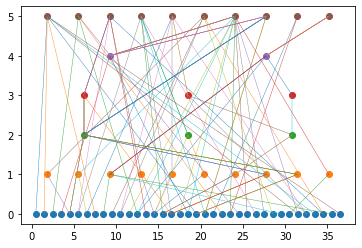

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 6, 1, 2, 1, 1, 6, 2, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 3, 2, 1,
       1, 7, 1, 3, 1, 7, 7, 7, 1, 2, 7, 4, 0, 7, 7, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 1, 2, 1, 1, 3, 2, 3, 3, 3, 2, 3, 0, 7, 3, 3, 3, 0, 4, 4,
       6, 4, 6, 6, 6, 6, 6, 6, 2, 6, 0, 6, 6, 6, 4, 6, 2, 4, 2, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 3, 1, 1, 2, 2, 3, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4722222222222222

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[15  0  0  0  1  2  1  0  0  0]
 [ 0 16  7  5  2  3  0  0 11  2]
 [ 1  0  8  4  1  3  1  2  3  1]
 [ 0  0  0  8  0  9  0  0  3 15]
 [ 0  2  0  0 10  0  4  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0 12  0  0  0]
 [ 0  1  0  1  6  1  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


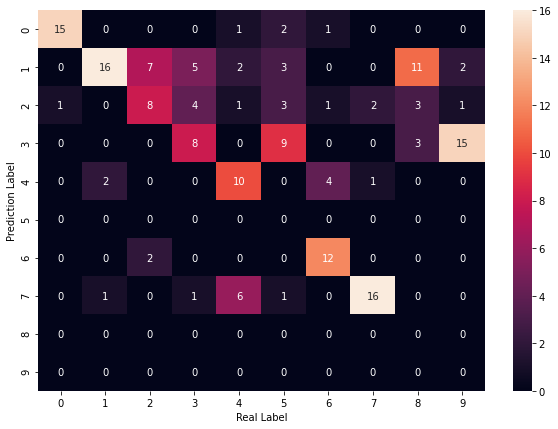

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 10, 3, 3, 2, 10]


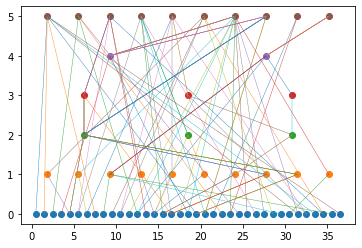

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

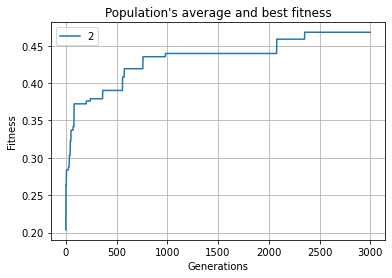

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [37, 10, 3, 3, 2, 10]
Total nodes:65 Total connections::116
